## 建图

In [2]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import math

In [3]:
with open('MC1.json', 'r') as file:
    json_data = json.load(file)
nodes = json_data['nodes']
links = json_data['links']

In [4]:
G = nx.DiGraph()
edges = []
for link in links:
    edges.append((link['source'], link['target']))
# edges = list(set(edges))
G.add_edges_from(edges)

In [5]:
suspects = ["Mar de la Vida OJSC", "979893388", "Oceanfront Oasis Inc Carriers", "8327"]
suspects_add = ['Spanish Shrimp  Carriers', 'Faroe Islands Shrimp Shark', 'b8567859-bf54-49fd-8332-5775e19c65af', 'Mar del Oeste Pic', 'SeaSpray Wave SRL Solutions', 'png xi  Line', '7505050', '435054320', '160']

### 分类

In [6]:
category = {'person':[], 'organization':[], 'company':[], 'political_organization':[], 'location':[], 'vessel':[], 'event':[],  'movement':[], 'undefined': []}
node_ids = []
for node in nodes:
    node_ids.append(node['id'])
    if 'type' in node.keys():
        category[node['type']].append(node['id'])
    else:
        category['undefined'].append(node['id'])

## 生成团体

In [7]:
def unity(node_type, edge_type):
    edges = []
    for link in links:
        if link['source'] in category[node_type] and link['target'] in category[node_type]:
            if 'type' in link.keys():
                if link['type'] == edge_type:
                    edges.append((link['source'], link['target']))

    G = nx.DiGraph()
    G.add_edges_from(edges)

    wcc = list(nx.weakly_connected_components(G))

    selected_wcc = list()
    isolated_node = list()
    cnt = 0
    for i in range(len(wcc)):
        cnt += len(wcc[i])
        selected_wcc.append(wcc[i])
        if node_type == 'organization':
            if '979893388' in wcc[i]:
                print(f'979893388 in wcc_o[{i}]')
            if '8327' in wcc[i]:
                print(f'8327 in wcc_o[{i}]')
    print(f'{node_type}, {edge_type}:')
    print(f"There are {len(selected_wcc)} weakly connected components (size>1).")
    print(f"There are {cnt} nodes that in selected wcc.(Total:{len(G.nodes)})")

    return selected_wcc

In [8]:
import matplotlib.pyplot as plt
def generate_plot(selected_cc, x, title):
    # 柱状图的数据
    cc_idx = range(len(selected_cc))
    values = [len(temp) for temp in selected_cc]

    # 创建柱状图
    plt.bar(cc_idx, values)

    # 添加标题和轴标签
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel("count")

    # 标注数据
    for i in range(len(cc_idx)):
        plt.text(i, values[i], str(values[i]), ha='center', va='bottom')

    # 显示图形
    plt.show()

### person_family

In [9]:
wcc_p = unity('person', 'family_relationship')

person, family_relationship:
There are 120 weakly connected components (size>1).
There are 652 nodes that in selected wcc.(Total:652)


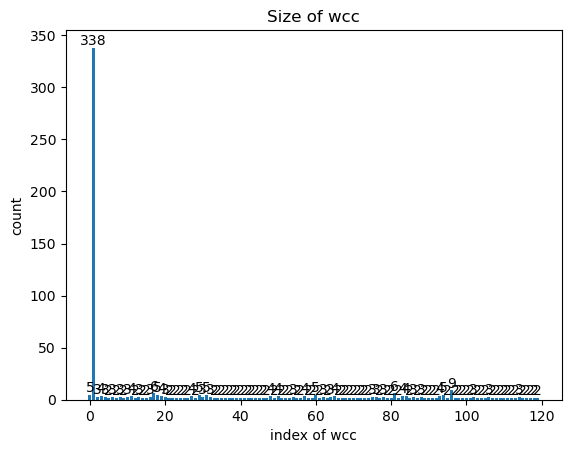

In [10]:
generate_plot(wcc_p, x = "index of wcc", title = "Size of wcc")

In [11]:
idx = 0
with open(f'Graph\person_family_relationship.txt', 'w') as file:
    for value in wcc_p:
        idx += 1
        file.write(str(idx) + ': ' + str(value) + '\n')

### company_partner

In [12]:
wcc_c = unity('company', 'partnership')

company, partnership:
There are 4 weakly connected components (size>1).
There are 12 nodes that in selected wcc.(Total:12)


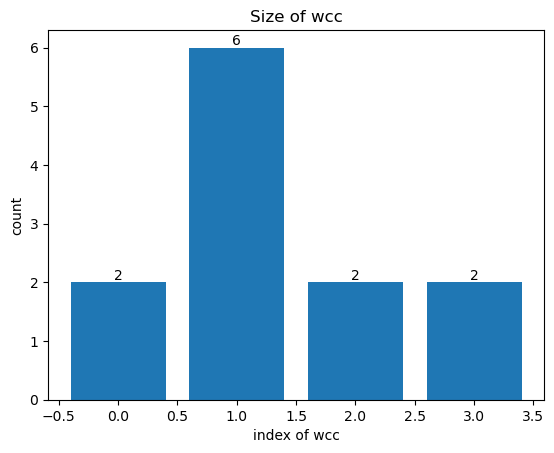

In [13]:
generate_plot(wcc_c, x="index of wcc", title="Size of wcc")

In [14]:
idx = 0
with open(f'Graph\company_partnership.txt', 'w') as file:
    for value in wcc_c:
        idx += 1
        file.write(str(idx) + ': ' + str(value) + '\n')

#### company_ownership

In [15]:
wcc_co = unity('company', 'ownership')

company, ownership:
There are 3 weakly connected components (size>1).
There are 11 nodes that in selected wcc.(Total:11)


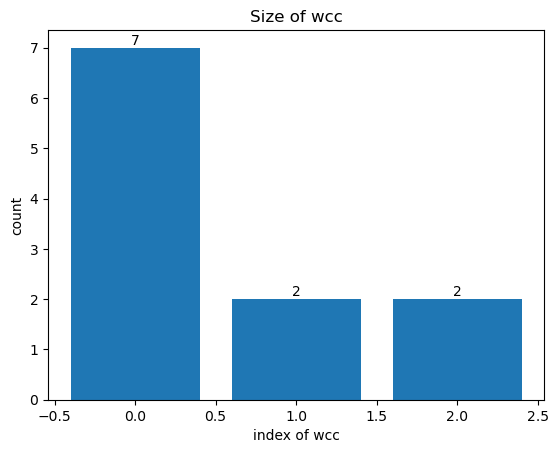

In [16]:
generate_plot(wcc_co, x="index of wcc", title="Size of wcc")

In [17]:
idx = 0
with open(f'Graph\company_ownership.txt', 'w') as file:
    for value in wcc_co:
        idx += 1
        file.write(str(idx) + ': ' + str(value) + '\n')

#### organization_ownership

In [9]:
wcc_oo = unity('organization', 'ownership')

979893388 in wcc_o[1]
8327 in wcc_o[1]
organization, ownership:
There are 46 weakly connected components (size>1).
There are 261 nodes that in selected wcc.(Total:261)


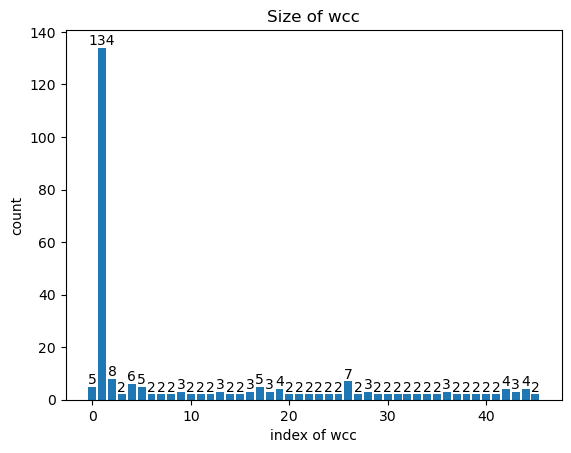

In [10]:
generate_plot(wcc_oo, x="index of wcc", title="Size of wcc")

In [48]:
idx = 0
with open(f'Graph\organization_ownership.txt', 'w') as file:
    for value in wcc_oo:
        idx += 1
        file.write(str(idx) + ': ' + str(value) + '\n')

### political_organization_ownership

In [21]:
wcc_po = unity('political_organization', 'ownership')

political_organization, ownership:
There are 5 weakly connected components (size>1).
There are 12 nodes that in selected wcc.(Total:12)


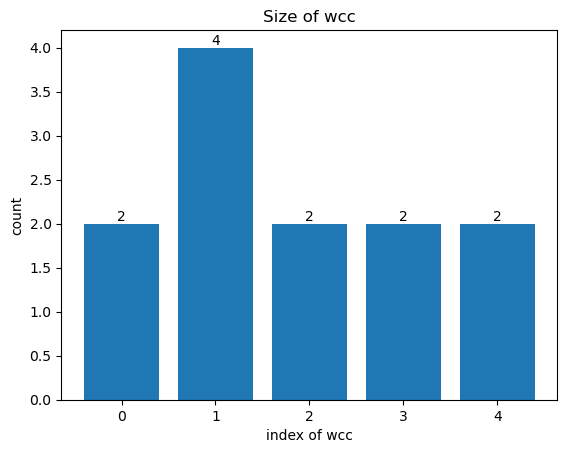

In [22]:
generate_plot(wcc_po, x="index of wcc", title="Size of wcc")

In [23]:
idx = 0
with open(f'Graph\political_organization_ownership.txt', 'w') as file:
    for value in wcc_po:
        idx += 1
        file.write(str(idx) + ': ' + str(value) + '\n')

### （大小>=unity_size）团体间的关系

In [0]:
wcc = {}
wcc['person_family'] = wcc_p
wcc['company_own'] = wcc_co
wcc['organization_own'] = wcc_oo
wcc['p_organization_own'] = wcc_po

9


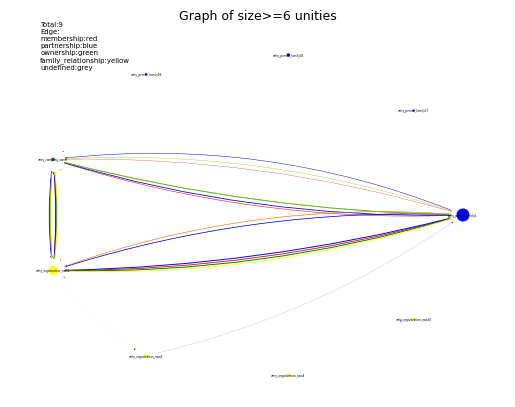

!


In [44]:
unity_size = 6

G = nx.DiGraph()
node_new = []
node_size = []
node2color = []
node_all = []

for key, value in wcc.items():
    for i in range(len(value)):
        if len(value[i]) >= unity_size:
            node_all.append(f'unity_{key}{i}')
print(len(node_all))

edges_new = []
edge_t = {'membership':[], 'partnership':[], 'ownership':[], 'family_relationship':[], 'undefined':[]}
edge_width = {'membership':[], 'partnership':[], 'ownership':[], 'family_relationship':[]}

for link in links:
    node1 = link['source']
    node2 = link['target']
    key1 = 'undefined'
    key2 = 'undefined'
    size1 = 1
    size2 = 1
    link_type = 'undefined'
    if 'type' in link.keys():
        link_type = link['type']
    flag1 = False
    flag2 = False
    for key, value in wcc.items():
        for i in range(len(value)):
            if len(value[i]) >= unity_size:
                if link['source'] in value[i]:
                    node1 = f'unity_{key}{i}'
                    key1 = key
                    flag1 = True
                    size1 = len(value[i])
                if link['target'] in value[i]:
                    node2 = f'unity_{key}{i}'
                    key2 = key
                    flag2 = True
                    size2 = len(value[i])
                if flag1 and flag2:
                    break

    # 边的粗细
    if node1 != node2 and flag1 and flag2:
        if node1 not in node_new:
            node_new.append(node1)
            node_size.append(size1)
            if key1 == 'person_family':
                node2color.append('blue')
            if key1 == 'company_own':
                node2color.append('green')
            if key1 == 'organization_own':
                node2color.append('yellow')
            if key1 == 'p_organization_own':
                node2color.append('purple')
        if node2 not in node_new:
            node_new.append(node2)
            node_size.append(size2)
            if key2 == 'person_family':
                node2color.append('blue')
            if key2 == 'company_own':
                node2color.append('green')
            if key2 == 'organization_own':
                node2color.append('yellow')
            if key2 == 'p_organization_own':
                node2color.append('purple')

        if (node1, node2) not in edge_t[link_type]:
            edge_t[link_type].append((node1, node2))
            edge_width[link_type].append(1)
        else:
            idx = edge_t[link_type].index((node1, node2))
            edge_width[link_type][idx]+=1

for name in node_all:
    if name not in node_new:
        node_new.append(name)
        node_size.append(0.5)
        if name[7] == 'e':
            node2color.append('blue')
        if name[7] == 'o':
            node2color.append('green')
        if name[7] == 'r':
            node2color.append('yellow')
        if name[7] == '_':
            node2color.append('purple')

G.add_nodes_from(node_all)

for key, value in edge_t.items():
    edges_new += value

G.add_edges_from(edges_new)

node_size = [100*np.log(1.005*((x - min(node_size)) / (max(node_size) - min(node_size)) + 1.0001)) for x in node_size]

# 标准化
for key, value in edge_width.items():
    min_val = min(value)    # 找到列表中的最小值
    max_val = max(value)    # 找到列表中的最大值0

    edge_width[key] = [np.log((x - min_val) / (max_val - min_val) + 1.0001) for x in value]

# Draw the graph
pos = nx.circular_layout(G)   # random_layout、circular_layout、shell_layout、spring_layout

nx.draw_networkx_nodes(G, pos=pos, nodelist=node_new, node_color=node2color, node_size=node_size)

# 添加节点标签
nx.draw_networkx_labels(G, pos=pos, font_size=2)

# Add edge labels using a loop
edge2color = {'membership':'red', 'partnership':'blue', 'ownership':'green', 'family_relationship':'yellow', 'undefined':'grey'}

for key, value in edge_t.items():
    for i in range(len(value)):
        nx.draw_networkx_edges(G, pos=pos, edgelist=[value[i]], width = edge_width[key][i], edge_color=edge2color[key], arrowsize=2.5, connectionstyle=f'arc3,rad={0.05+0.01*i}')

plt.axis('off')
plt.title(f'Graph of size>={unity_size} unities', fontsize=9)
text = f'Total:{len(node_new)}\n'
text += f'Edge:\n'
text += f'membership:red\npartnership:blue\nownership:green\nfamily_relationship:yellow\nundefined:grey'

plt.text(-1, 0.9, text, fontsize=5)

plt.savefig(f'Graph\size_{unity_size}_unities(circular).pdf')

plt.show()

## 团体的一阶邻居

In [ ]:
node2type = {}
for n in nodes:
    if 'type' in n.keys():
        node2type[n['id']] = n['type']
    else:
        node2type[n['id']] = 'undefined'

In [ ]:
def draw_familynet(node2type, links, wcc, nodetype, edgetpe, index):
    G = nx.DiGraph()

    node_normal = []
    edges = []
    edges_width = []
    count = {'person':0, 'organization':0, 'company':0, 'political_organization':0, 'location':0, 'vessel':0, 'event':0, 'movement':0 , 'undefined':0}

    for link in links:
        node1 = link['source']
        node2 = link['target']
        if node1 in wcc[nodetype][index] and node2 not in wcc[nodetype][index]:
            node1 = f'unity_{edgetpe}{index}'
        if node2 in wcc[nodetype][index] and node1 not in wcc[nodetype][index]:
            node2 = f'unity_{edgetpe}{index}'

        if node1 == f'unity_{edgetpe}{index}' or node2 == f'unity_{edgetpe}{index}':
            if (node1, node2) not in edges:
                edges.append((node1, node2))
                edges_width.append(1)
            else:
                i = edges.index((node1, node2))
                edges_width[i] += 1

            if node1 not in node_normal:
                node_normal.append(node1)
                if node1 != f'unity_{edgetpe}{index}':
                    count[node2type[node1]] += 1
            if node2 not in node_normal:
                node_normal.append(node2)
                if node2 != f'unity_{edgetpe}{index}':
                    count[node2type[node2]] += 1

    # 将列表转换为NumPy数组
    edges_width = np.array(edges_width)
    #
    # 对数组进行正则化
    edges_width = 1.0*edges_width / np.sum(edges_width)
    if len(G.nodes) > 5:
        edges_width *= 5.0

    # 添加边
    G.add_edges_from(edges)

    # 确定节点位置布局
    pos = nx.spring_layout(G)

    # 绘制节点和边
    nx.draw_networkx_nodes(G, pos, nodelist=node_normal, node_color='blue', node_size=25)
    nx.draw_networkx_edges(G, pos, width=edges_width, arrowsize=2.5,connectionstyle='arc3,rad=0.2')    #, arrowstyle='->'

    # 添加节点标签edges_width
    nx.draw_networkx_labels(G, pos, font_size=2.5)

    # 显示图形
    plt.title(f'Unity network({index})', fontsize=9)

    plt.axis('off')

    text = f'Nodes:{len(G.nodes)}\n'
    for key, value in count.items():
        text += str(key) + ": " + str(value) +'\n'
    plt.text(-1.1, 0.72, text, fontsize=4)

    plt.savefig(f"Graph\\network({edgetpe}{index}).pdf")

    plt.show()

In [ ]:
# for i in range(0, 10):
#     draw_familynet(node2type ,links, wcc, 'person', 'family', i)

In [ ]:
draw_familynet(node2type ,links, wcc, 'company', 'company_partner', 4)